# Data Mining & Machine Learning - Regression Part 2

### Case 2: Prediction of Footballer Values with Supervised Learning

83109 Samuel Didovic<br>
86368 Isabel Lober<br>
85915 Pascal Seitz<br>

Lecturer: Prof. Dr. Adrian Moriariu

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics
import os
import seaborn as sns
import matplotlib as mpl

In [3]:
# Loading the data
filename = "football_cleaned"

# Data folder
data_dir = "football-data"

file_path = f"{data_dir}/{filename}.csv"

# Read the CSV file directly, specifying the delimiter and thousands separator
df = pd.read_csv(file_path, delimiter=',', thousands=',')

In [4]:
df.head()

,player,position,squad,age,birth_year,value,height,foot,league,games,...,Attendance,CL,WinCL,Season,year,player_id,nationality_code,positions_played,position_type,specific_position
0,Burgui,"FW,MF",Alavés,23.0,1993.0,1800000.0,186.0,right,La Liga,23.0,...,16819.0,0.0,0.0,201718#,2017,379.0,ESP,2,Forward,Left-Winger
1,Raphaël Varane,DF,Real Madrid,24.0,1993.0,70000000.0,191.0,right,La Liga,27.0,...,66161.0,1.0,1.0,201718#,2017,2530.0,FRA,1,Defender,Centre-back
2,Rubén Duarte,DF,Alavés,21.0,1995.0,2000000.0,179.0,left,La Liga,24.0,...,16819.0,0.0,0.0,201718#,2017,721.0,ESP,1,Defender,Left-back
3,Samuel Umtiti,DF,Barcelona,23.0,1993.0,60000000.0,182.0,left,La Liga,25.0,...,66603.0,1.0,0.0,201718#,2017,2512.0,FRA,1,Defender,Centre-back
4,Manu García,MF,Alavés,31.0,1986.0,1800000.0,183.0,left,La Liga,30.0,...,16819.0,0.0,0.0,201718#,2017,882.0,ESP,1,Midfielder,Defensive-Midfield


In [5]:
df.set_index('player_id', inplace=True)

In [6]:
# Identifying non-numeric features
non_numeric_features = df.select_dtypes(include=['object', 'category']).columns

print(non_numeric_features)

Index(['player', 'position', 'squad', 'foot', 'league', 'Season',
       'nationality_code', 'position_type', 'specific_position'],
      dtype='object')


In [7]:
columns_to_drop = ['player', 'birth_year', 'Season', 'value', 'year', 'Attendance']  # Columns to drop from the dataset 

X = df.drop(columns_to_drop, axis=1)  # Drop target and any non-predictive columns
y = df['value']  # Target variable


In [8]:
# Identifying numerical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor

# Define categorical features
categorical_features = ['position', 'squad', 'league', 'nationality_code', 'specific_position', 'position_type', 'foot'] 

# Create transformers for categorical and numerical data
categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown="ignore"))
])

numerical_transformer = Pipeline([
    ('scaler', StandardScaler())  # Standardizing numerical features
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ], remainder='passthrough')


In [10]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of StandardScaler
scaler = StandardScaler()

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))

# Transform the test data using the same scaler
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

In [11]:
# Create the full pipeline with a regressor
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42, verbose=1))
])

# Now we can fit and evaluate the pipeline
full_pipeline.fit(X_train, y_train_scaled)


      Iter       Train Loss   Remaining Time 
         1           0.8553            1.10m
         2           0.7364            1.06m
         3           0.6358            1.03m
         4           0.5551            1.03m
         5           0.4854            1.04m
         6           0.4237            1.05m
         7           0.3730            1.04m
         8           0.3328            1.03m
         9           0.2964            1.02m
        10           0.2652            1.00m
        20           0.1201           51.02s
        30           0.0777           43.69s
        40           0.0576           36.93s
        50           0.0466           30.49s
        60           0.0401           24.26s
        70           0.0352           18.05s
        80           0.0317           11.99s
        90           0.0287            5.99s
       100           0.0267            0.00s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'height', 'games',
                                                   'games_starts', 'minutes',
                                                   'goals', 'assists',
                                                   'pens_made', 'pens_att',
                                                   'cards_yellow', 'cards_red',
                                                   'goals_per90',
                                                   'assists_per90',
                                                   'goals_assists_per90',
                                                   'goals_pens_per90',
                                                   'goals_assists_pens_p...
                                                   'minutes_90s', 'shots_total',
                                                   'shots_on_target',
                                                   'shots_free_kicks',
                                                   'shots_on_target_pct',
                                                   'shots_total_per90', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['position', 'squad',
                                                   'league', 'nationality_code',
                                                   'specific_position',
                                                   'position_type',
                                                   'foot'])])),
                ('regressor',
                 GradientBoostingRegressor(max_depth=6, random_state=42,
                                           verbose=1))])

In [12]:
# Evaluate the model
y_test_pred = full_pipeline.predict(X_test)
y_train_pred = full_pipeline.predict(X_train)

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tabulate import tabulate

def evaluate_regression_model(y_train, y_train_pred, y_test, y_test_pred):
    """
    Evaluates the performance of a regression model by calculating and displaying
    several common metrics in a formatted table.
    
    Parameters:
    - y_train (array-like): Actual target values for the training set.
    - y_train_pred (array-like): Predicted target values for the training set.
    - y_test (array-like): Actual target values for the test set.
    - y_test_pred (array-like): Predicted target values for the test set.
    
    Returns:
    - A dictionary containing the calculated metrics for both the training and testing sets.
    """
    
    # Calculate the metrics
    metrics = {
        "Mean Squared Error (MSE)": [mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)],
        "Mean Absolute Error (MAE)": [mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred)],
        "Root Mean Squared Error (RMSE)": [np.sqrt(mean_squared_error(y_train, y_train_pred)), np.sqrt(mean_squared_error(y_test, y_test_pred))],
        "R-squared": [r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)]
    }
    
    # Prepare the data for tabulation
    table = [["Metric", "Train", "Test"]]
    for metric, values in metrics.items():
        table.append([metric, f"{values[0]:.2f}", f"{values[1]:.2f}"])
    
    # Print the table
    print(tabulate(table, headers="firstrow", tablefmt="github"))

    return metrics

_ = evaluate_regression_model(y_train_scaled, y_train_pred, y_test_scaled, y_test_pred)

| Metric                         |   Train |   Test |
|--------------------------------|---------|--------|
| Mean Squared Error (MSE)       |    0.03 |   0.22 |
| Mean Absolute Error (MAE)      |    0.12 |   0.26 |
| Root Mean Squared Error (RMSE) |    0.16 |   0.47 |
| R-squared                      |    0.97 |   0.75 |


In [14]:
def plot_predictions(y_train, y_train_pred, y_test, y_test_pred):
    """
    Plots the actual vs. predicted values for training and testing datasets.

    Parameters:
    - y_train: Actual values from the training set.
    - y_train_pred: Predicted values for the training set.
    - y_test: Actual values from the testing set.
    - y_test_pred: Predicted values for the testing set.
    """

    plt.figure(figsize=(14, 8))  # Set up the figure with a larger size for better visibility

    # Plot test predictions in blue
    plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5, edgecolor='k', label='Test Predictions')
    # Plot training predictions in red
    plt.scatter(y_train, y_train_pred, color='red', alpha=0.5, edgecolor='k', label='Train Predictions')
    # Add a line of perfect prediction
    plt.plot([0, max(y_test.max(), y_train.max())], [0, max(y_test.max(), y_train.max())], 
             color='black', linestyle='--', label='Perfect Prediction')

    # Adding titles and labels
    plt.title('Actual vs. Predicted Values', fontsize=20)
    plt.xlabel('Actual Values', fontsize=16)
    plt.ylabel('Predicted Values', fontsize=16)

    # Add a grid for better readability
    plt.grid(True)

    # Add a legend to explain which markers are which
    plt.legend(title="Legend", title_fontsize='13', fontsize='12', loc='upper left')

    # Show the plot
    plt.show()

def plot_histograms(y_actual, y_predicted):
    """
    Plots histograms of actual and predicted values for comparison.
    This function uses consistent styling with other visualization functions in the analysis,
    focusing on using blue for actual values and red for predicted values to maintain visual consistency.

    Parameters:
    - y_actual (array-like): Actual target values.
    - y_predicted (array-like): Predicted target values.
    """
    
    fig, ax = plt.subplots(figsize=(14, 8))  # Use the same figure size as the plot_predictions for consistency
    
    # Plot histogram of actual values
    ax.hist(y_actual, bins=30, alpha=0.5, color='blue', label='Actual', edgecolor='black')
    
    # Plot histogram of predicted values
    ax.hist(y_predicted, bins=30, alpha=0.5, color='red', label='Predicted', edgecolor='black')
    
    # Adding titles and labels with improved formatting to match plot_predictions
    ax.set_xlabel('Value', fontsize=16)
    ax.set_ylabel('Frequency', fontsize=16)
    ax.set_title('Histogram of Actual and Predicted Values', fontsize=20)
    
    # Add a grid for better readability, matching the style in plot_predictions
    ax.grid(True, linestyle='--', alpha=0.5)
    
    # Improve the legend with fontsize and location
    ax.legend(title="Legend", title_fontsize='13', fontsize='12', loc='upper right')
    
    # Show the plot
    plt.show()

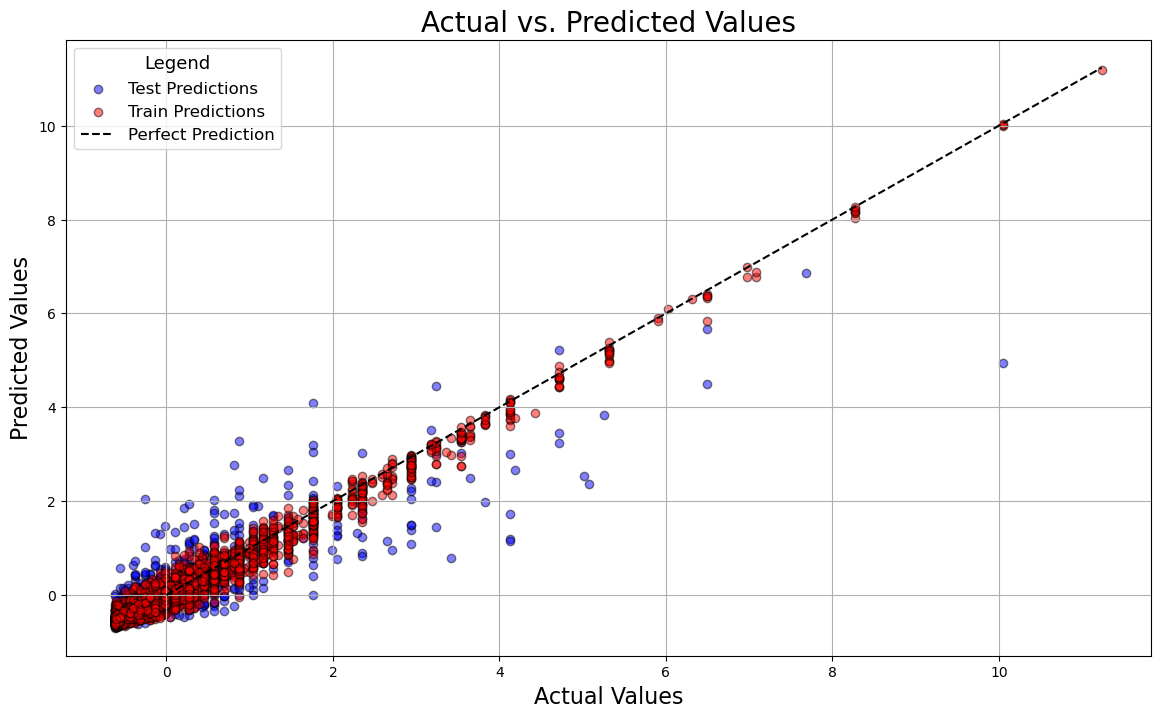

In [15]:
plot_predictions(y_train_scaled, y_train_pred, y_test_scaled, y_test_pred)

In [17]:
# Extracting the feature importances from the regressor within the pipeline
feature_importances = full_pipeline.named_steps['regressor'].feature_importances_

# Access the preprocessor step in your pipeline
preprocessor = full_pipeline.named_steps['preprocessor']

# Initialize an empty list to store feature names
feature_names = []

# Iterate over all transformers within the ColumnTransformer
for transformer_name, transformer, columns in preprocessor.transformers_:
    if transformer_name == 'remainder':
        # Process remainder which could be 'passthrough' or another transformer
        if transformer == 'passthrough':
            # If 'passthrough', the original feature names in these columns are added
            feature_names.extend(columns)
    else:
        if hasattr(transformer, 'named_steps'):
            # Access the final step of each sub-pipeline in the transformer
            transformer = transformer.named_steps[list(transformer.named_steps.keys())[-1]]
        
        if hasattr(transformer, 'get_feature_names_out'):
            # For transformers with this method (like OneHotEncoder)
            if isinstance(columns, slice):
                transformer_feature_names = transformer.get_feature_names_out(preprocessor.feature_names_in_[columns])
            else:
                transformer_feature_names = transformer.get_feature_names_out(columns)
            feature_names.extend(transformer_feature_names)
        else:
            # For transformers that do not modify feature names (like StandardScaler), just add the original names
            feature_names.extend(columns)


In [19]:
# Create a DataFrame of features and their importance
features_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame to see the most important features at the top
features_importance = features_importance.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print(features_importance.head(10))

                   Feature  Importance
379                    Pts    0.155649
26         shots_on_target    0.107658
131           pass_targets    0.073186
0                      age    0.064117
126  players_dribbled_past    0.036620
385                     CL    0.031010
373                      W    0.030384
5                    goals    0.023963
37                  passes    0.020184
531  league_Premier League    0.020044


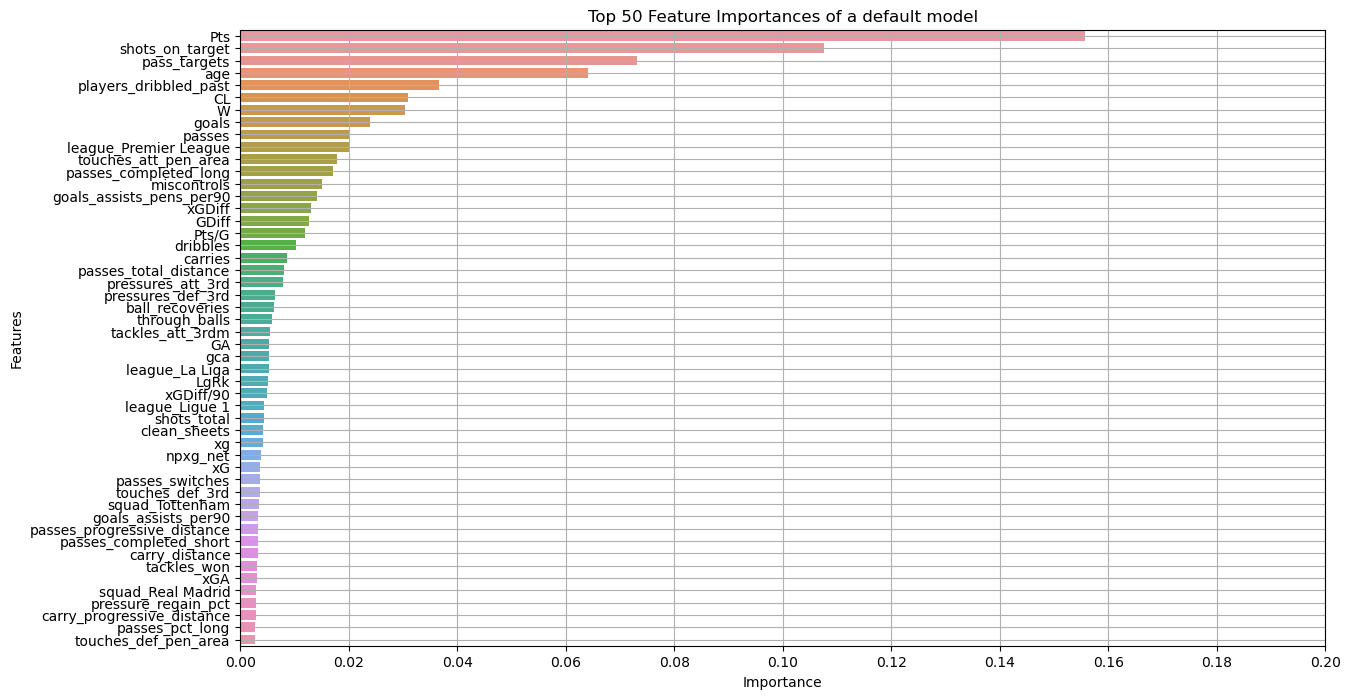

In [31]:
plt.figure(figsize=(14, 8))
sns.barplot(data=features_importance.head(50), x='Importance', y='Feature')
plt.title('Top 50 Feature Importances of a default model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.xticks(np.arange(0, 0.21, 0.02))
# Add a grid for better readability
plt.grid(True)

# Show the plot
plt.show()